In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

In [2]:
data=pd.read_csv("/content/heart_disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,FALSE,normal,120,0,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,0,st-t abnormality,120,1,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,0,lv hypertrophy,123,1,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,1,st-t abnormality,105,TURE,NaN,downsloping,normal,4
907,57,Male,asymptomatic,142,277,1,st-t abnormality,182,FALSE,NaN,flat,reversable defect,4


In [ ]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 92.3+ KB


In [ ]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,False,False,False,False,False,False,False,False,False,False,False,False,False
904,False,False,False,False,False,False,False,False,False,False,False,False,False
905,False,False,False,False,False,False,False,False,False,False,False,False,False
906,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
data.isnull().values.any()

np.True_

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
data.isnull().sum().sum()

np.int64(62)

In [ ]:
data.age.unique()

array([63, 41, 57, 52, 66, 56, 48, 53, 30, 54, 37, 46, 68, 76, 58, 42, 64,
       71, 69, 45, 44, 39, 62, 50, 55, 49, 43, 51, 36, 59, 61, 60, 67, 70,
       47, 65, 38, 34, 35, 29, 74, 75, 40, 72, 31, 73, 33, 32, 77])

In [ ]:
data.cp.value_counts()

,count
cp,
asymptomatic,495
non-anginal,203
atypical angina,165
typical angina,45


In [ ]:
data.chol.value_counts().unique()

array([172,   9,   8,   7,   6,   5,   4,   3,   2,   1])

In [ ]:
data.thalch.unique()

array([150, 132, 148, 190, 126, 138, 128, 140, 160, 170, 114, 152, 169,
       187, 115, 116, 122, 125, 131, 143, 149, 151, 153, 157, 158, 161,
       162, 165, 166, 168, 173, 175, 180, 181, 184, 120, 137, 144,  96,
       123, 130, 139, 142, 155, 156, 159, 163, 167, 171, 172, 174, 178,
       179, 182, 185, 186, 188, 192, 202, 121, 154, 164, 145, 194, 112,
        97, 146, 147, 105, 133, 111, 100,  80, 118,  69, 141,  98, 124,
        99, 110, 134, 135,  86,  90, 106, 107, 127, 129, 136, 176,  82,
        87,  81,  92, 103, 109,  72,  68, 177,  88,  93, 113, 195, 108,
       101, 117,  91,  94, 102, 119,  67,  60,  71,  83,  84,  95, 104,
        70,  78,  63,  77,  73])

In [ ]:
data.mean(numeric_only=True)

,0
age,53.791850
trestbps,133.430617
chol,201.484581
fbs,0.203744
thalch,135.957048
oldpeak,0.891253
num,1.008811


In [ ]:
data.median(numeric_only=True)

,0
age,54.0
trestbps,130.0
chol,224.0
fbs,0.0
thalch,138.0
oldpeak,0.5
num,1.0


In [ ]:
data.mode(numeric_only=True)

,age,trestbps,chol,fbs,thalch,oldpeak,num
0,54,120,0,False,140,0.0,0


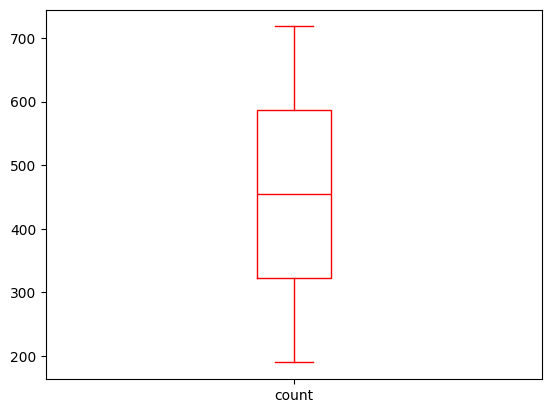

In [ ]:
data.sex.value_counts().plot(kind='box',color='red')
plt.show()

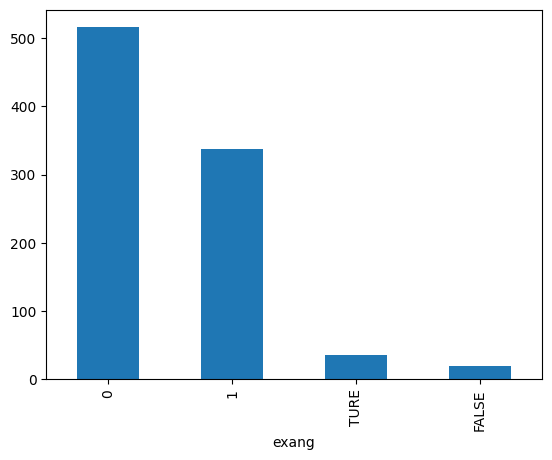

In [ ]:
data.exang.value_counts().plot(kind='bar')
plt.show()

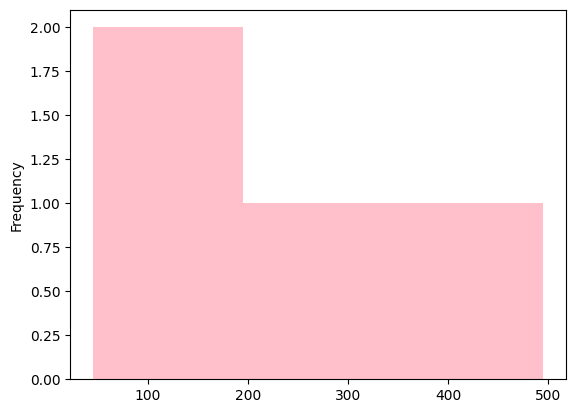

In [ ]:
data.cp.value_counts().plot(kind='hist',bins=3,color='pink')
plt.show()

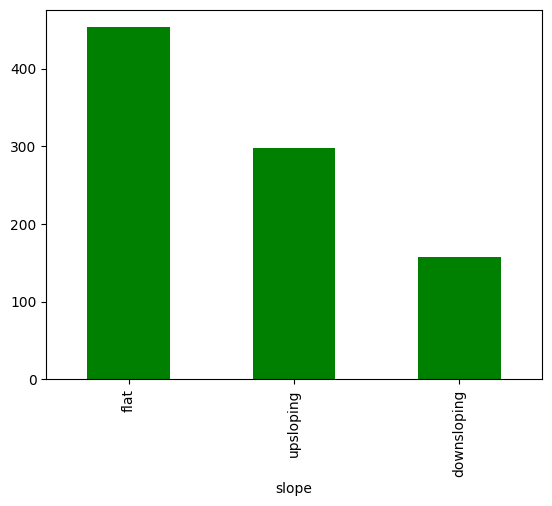

In [ ]:
data.slope.value_counts().plot(kind='bar',color='green')
plt.show()

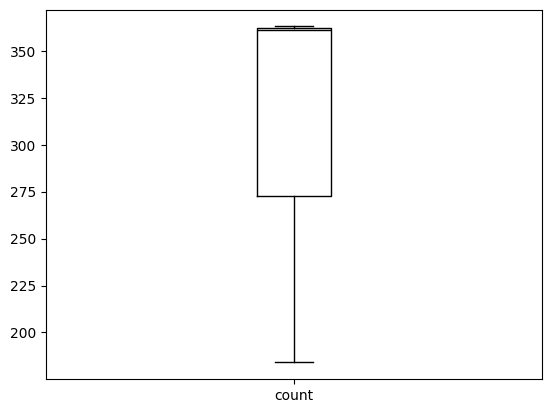

In [ ]:
data.thal.value_counts().plot(kind='box',color='black')
plt.show()

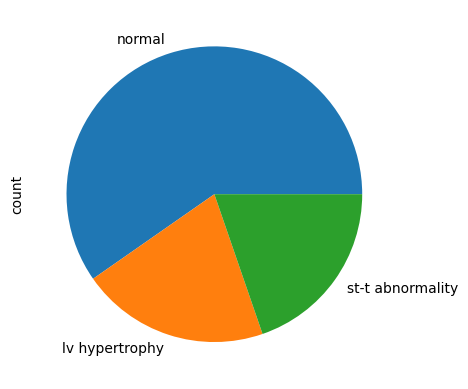

In [ ]:
data.restecg.value_counts().plot(kind='pie',color='violent')
plt.show()

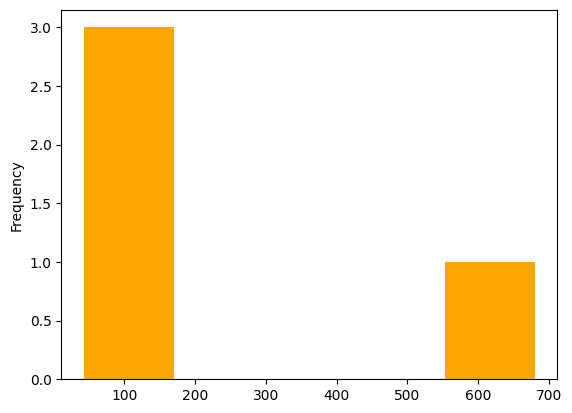

In [ ]:
data.fbs.value_counts().plot(kind='hist',bins=5,color='orange')
plt.show()

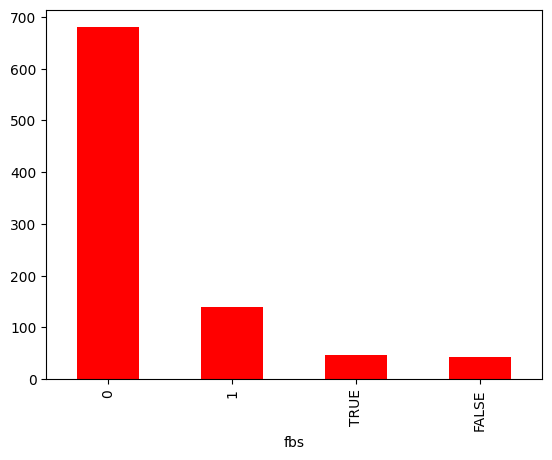

In [ ]:
data.fbs.value_counts().plot(kind='bar',color='red')
plt.show()

In [5]:
data5=pd.get_dummies(data,dtype=float)

In [6]:
data5


,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,41,135,203,False,132,0.0,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,57,140,192,False,148,0.4,0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,52,118,186,False,190,0.0,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,57,110,201,False,126,1.5,0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
904,62,166,170,False,120,3.0,4,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
905,56,170,0,False,123,2.5,4,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
906,56,144,208,True,105,NaN,4,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [7]:
corr=data5.corr(numeric_only=True)

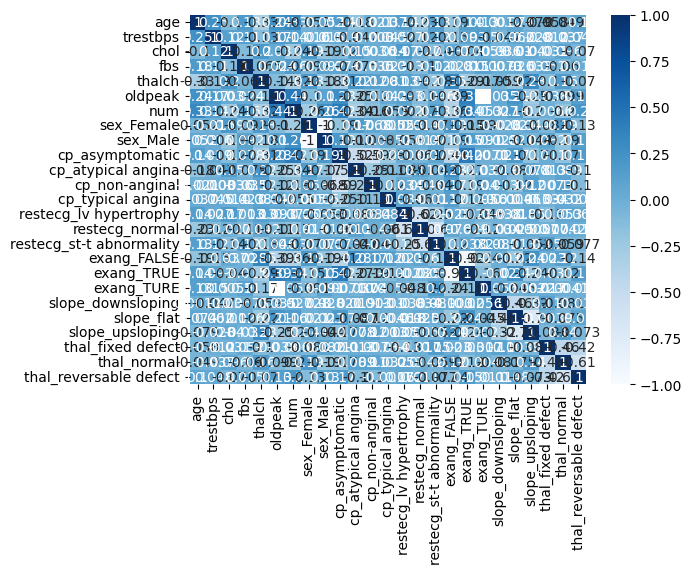

In [8]:
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

In [ ]:
category_df=data.select_dtypes(include=['category','object'])

In [ ]:
category_df

,sex,cp,restecg,exang,slope,thal
0,Male,typical angina,lv hypertrophy,FALSE,downsloping,fixed defect
1,Male,atypical angina,normal,FALSE,flat,fixed defect
2,Male,asymptomatic,normal,FALSE,flat,fixed defect
3,Male,typical angina,lv hypertrophy,FALSE,flat,fixed defect
4,Male,asymptomatic,normal,TRUE,flat,fixed defect
...,...,...,...,...,...,...
903,Male,asymptomatic,normal,FALSE,upsloping,normal
904,Male,asymptomatic,st-t abnormality,TRUE,flat,fixed defect
905,Male,non-anginal,lv hypertrophy,TRUE,downsloping,fixed defect
906,Male,non-anginal,st-t abnormality,TURE,downsloping,normal


In [ ]:
numeric_df=data.select_dtypes(include=['number'])

In [ ]:
numeric_df

,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233,150,2.3,0
1,41,135,203,132,0.0,0
2,57,140,192,148,0.4,0
3,52,118,186,190,0.0,0
4,57,110,201,126,1.5,0
...,...,...,...,...,...,...
903,53,125,0,120,1.5,4
904,62,166,170,120,3.0,4
905,56,170,0,123,2.5,4
906,56,144,208,105,NaN,4


In [ ]:
numerical_features=['age','trestbps','chol','fbs','thalch','oldpeak','num']


In [ ]:
data[numerical_features]

,age,trestbps,chol,fbs,thalch,oldpeak,num
0,63,145,233,True,150,2.3,0
1,41,135,203,False,132,0.0,0
2,57,140,192,False,148,0.4,0
3,52,118,186,False,190,0.0,0
4,57,110,201,False,126,1.5,0
...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4
904,62,166,170,False,120,3.0,4
905,56,170,0,False,123,2.5,4
906,56,144,208,True,105,NaN,4


In [ ]:
data.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,FALSE,0.0,flat,normal,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,TRUE,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4


In [ ]:
data.dropna(axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,downsloping,normal,4


In [ ]:
scaler=StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
print(data[numerical_features])

          age  trestbps      chol       fbs    thalch   oldpeak       num
0    1.006027  0.567394  0.281297  1.976894  0.524183  1.288612 -0.881977
1   -1.397560  0.076967  0.013526 -0.505844 -0.147705 -0.815249 -0.881977
2    0.350503  0.322181 -0.084656 -0.505844  0.449529 -0.449360 -0.881977
3   -0.195767 -0.756760 -0.138211 -0.505844  2.017268 -0.815249 -0.881977
4    0.350503 -1.149102 -0.004325 -0.505844 -0.371668  0.556834 -0.881977
..        ...       ...       ...       ...       ...       ...       ...
903 -0.086513 -0.413461 -1.798388 -0.505844 -0.595631  0.556834  2.615119
904  0.896773  1.597292 -0.281021 -0.505844 -0.595631  1.928917  2.615119
905  0.241249  1.793463 -1.798388 -0.505844 -0.483649  1.471556  2.615119
906  0.241249  0.518352  0.058155  1.976894 -1.155538       NaN  2.615119
907  0.350503  0.420266  0.674027  1.976894  1.718651       NaN  2.615119

[908 rows x 7 columns]


In [10]:
X=data5.iloc[:,1:]

In [11]:
X

,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,145,233,True,150,2.3,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,135,203,False,132,0.0,0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,140,192,False,148,0.4,0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,118,186,False,190,0.0,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,110,201,False,126,1.5,0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,125,0,False,120,1.5,4,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
904,166,170,False,120,3.0,4,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
905,170,0,False,123,2.5,4,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
906,144,208,True,105,NaN,4,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [12]:
Y=data5.iloc[:,:1]

In [13]:
Y

,age
0,63
1,41
2,57
3,52
4,57
...,...
903,53
904,62
905,56
906,56


In [14]:
print(data['age'].isnull().sum())


0


In [20]:
cleaned_data=pd.concat([X,Y],axis=1).dropna()

In [28]:
X_cleaned=cleaned_data.drop('age',axis=1)
Y_cleaned=cleaned_data['age']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X_cleaned,Y_cleaned,test_size=0.4,random_state=50)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((507, 24), (339, 24), (507,), (339,))

In [31]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
y_pred=model.predict(x_test)

In [33]:
y_pred

array([67, 44, 50, 46, 48, 45, 62, 55, 37, 54, 39, 42, 36, 76, 53, 51, 67,
       55, 52, 53, 57, 52, 68, 56, 41, 63, 65, 58, 62, 54, 55, 41, 72, 41,
       43, 62, 43, 52, 60, 71, 56, 55, 57, 35, 56, 57, 53, 59, 52, 41, 66,
       63, 52, 50, 55, 67, 49, 69, 63, 54, 55, 43, 48, 54, 63, 60, 47, 54,
       76, 70, 49, 59, 58, 46, 70, 43, 53, 39, 63, 37, 41, 49, 60, 41, 52,
       52, 53, 41, 55, 63, 52, 56, 42, 46, 37, 42, 56, 57, 54, 61, 48, 58,
       41, 48, 64, 53, 39, 44, 51, 50, 59, 42, 68, 50, 62, 67, 39, 68, 52,
       54, 44, 44, 52, 51, 46, 62, 42, 57, 36, 63, 56, 35, 53, 42, 39, 57,
       36, 61, 35, 57, 44, 54, 49, 62, 51, 62, 52, 56, 66, 46, 71, 52, 52,
       60, 48, 66, 54, 53, 48, 60, 60, 40, 52, 44, 48, 53, 58, 54, 51, 47,
       43, 51, 60, 40, 59, 51, 65, 41, 54, 40, 42, 57, 41, 59, 59, 67, 49,
       54, 43, 55, 61, 42, 58, 62, 48, 53, 52, 50, 52, 44, 36, 55, 41, 51,
       32, 51, 39, 55, 38, 56, 42, 57, 43, 56, 37, 46, 63, 55, 64, 45, 47,
       48, 36, 57, 58, 42

In [35]:
acc=accuracy_score(y_test,y_pred)
rec=recall_score(y_test,y_pred,average='weighted')
pre=precision_score(y_test,y_pred,average='weighted')

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
print(f"accuracy: {acc:.3f}")
print(f"recall: {rec:.3f}")
print(f"precision: {pre:.3f}")

accuracy: 0.035
recall: 0.035
precision: 0.033


In [38]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # log_loss for probabilistic trees (only in sklearn >= 1.1)
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [ ]:
grid=GridSearchCV(model,param_grid,cv=5)
grid.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [43]:
y_pred=grid.predict(x_test)

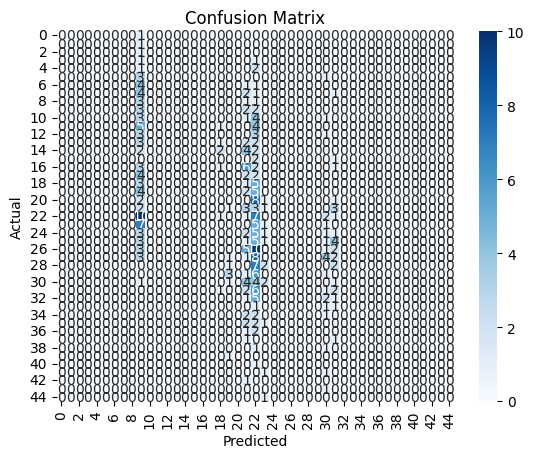

In [48]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [50]:
print("Best param", grid.best_params_)

Best param {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         3
          37       0.00      0.00      0.00         4
          38       0.00      0.00      0.00         6
          39       0.00      0.00      0.00         8
          40       0.00      0.00      0.00         5
          41       0.03      0.43      0.06         7
          42       0.00      0.00      0.00         9
          43       0.00      0.00      0.00        10
          44       0.00      0.00      0.00         7
          45       0.00      0.00      0.00         8
          46       0.00      0.00      0.00        10
          47       0.00      0.00      0.00         3
          48       0.00      0.00      0.00        13
          49       0.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


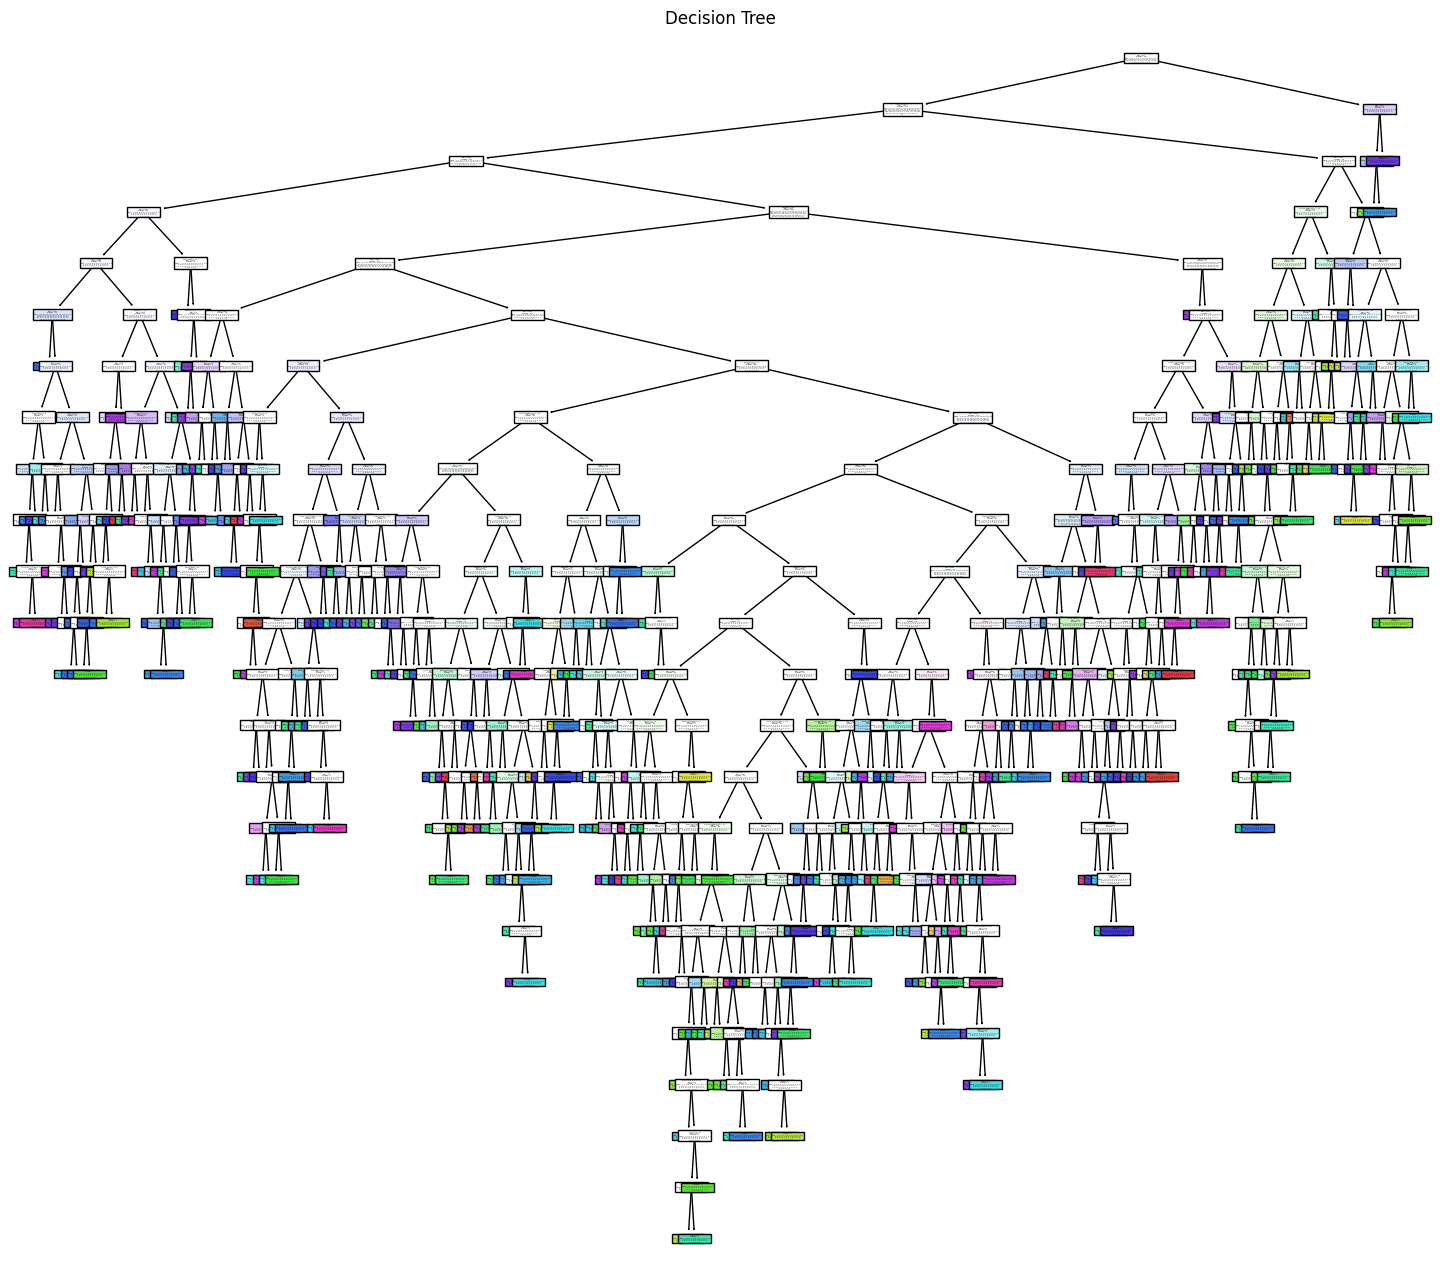

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,16))
plot_tree(model, feature_names=X_cleaned.columns, filled=True)
plt.title("Decision Tree")
plt.show()

In [ ]:
The model achieved a moderate accuracy of 69.78% after tuning.
Precision and recall were high for class 0 but poor for other classes, indicating class imbalance.
This suggests the model struggles to generalize across all target classes.

In [ ]:
-->max_depth: Limits the depth of the tree to prevent overfitting.
-->min_samples_split: Minimum number of samples required to split a node; higher values reduce overfitting.
-->criterion (gini or entropy) determines the function to measure the quality of a split.
-->min_samples_leaf: Sets the minimum number of samples at a leaf node; useful for smoothing the model.

In [ ]:
-->Label Encoding assigns an integer value to each category (e.g., Red=0, Blue=1). It introduces ordinal relationships which may mislead some models.
-->One-Hot Encoding creates binary columns for each category, avoiding any implicit order, making it ideal for nominal (non-ordinal) data.
-->One-hot is generally safer for ML models that assume numerical distance between values.